# Imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import einsteinpy as gr

from scipy.integrate import solve_ivp

# Draft

Goal: Derive orbit equations from the effective potential in static spherically symmetric space-times 

> raytracing of the photon sphere

> black hole shadows

> perihelion 

> stability of orbits

## The effective potential

Defining the tensor (1) symbolically: 

In [9]:
from einsteinpy.symbolic import MetricTensor

# Define the coordinates
t, r, theta, phi = sp.symbols('t r theta phi')

# Define the metric functions f(r), g(r), and h(r)
f = sp.Function('f')(r)
g = sp.Function('g')(r)
h = sp.Function('h')(r)

# Create the diagonal metric matrix (ds^2 = -f(r) dt^2 + g(r) dr^2 + h(r) (dθ^2 + sin^2(θ) dφ^2))
m = sp.diag(-f, g, h, h * sp.sin(theta) ** 2).tolist()

# Create the metric tensor
metric = MetricTensor(m, [t, r, theta, phi])

# Display the metric tensor
metric.tensor()

[[-f(r), 0, 0, 0], [0, g(r), 0, 0], [0, 0, h(r), 0], [0, 0, 0, h(r)*sin(theta)**2]]

Solving the equations of motion

In [49]:
# constants
M = 1.0 # Mass of the black hole
sigma = 0 # null geodesic
E = 1.0 # Energy of the particle
L = 3.0 # Angular momentum of the particle

# define the Schwarzschild metric functions
def f(r, M):
    return 1 - 2 * M / r

def g(r, M):
    return (1 - 2 * M / r)**(-1)

def h(r):
    return r ** 2

# equations of motion
def EOM(tau, y, params, sigma=0):
    t, r, phi = y
    E, L, M = params

    dtdtau = E / f(r,M)
    dphidtau = L / h(r)
    drdtau = np.sqrt( g(r,M)**(-1) * ( f(r,M)**(-1)*E**2 + (sigma - L**2*h(r)**(-1)) ) )

    return [dtdtau, drdtau, dphidtau]

def V_eff(r, L, simga=0):
    return f(r,M) * (sigma - (L**2*h(r)**(-1))) 

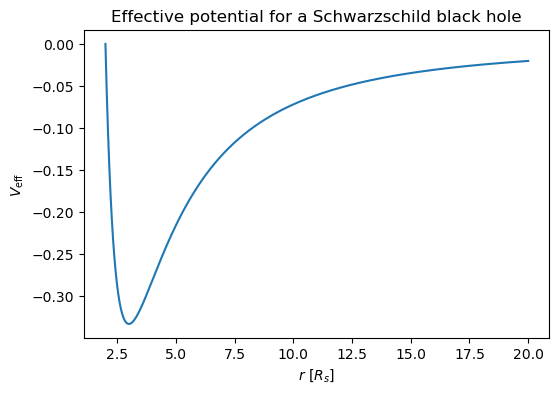

In [31]:
rs = 2*M # Schwarzschild radius

r_list = np.linspace(rs, 10*rs, 1000)

# Calculate the effective potential
V_eff_list = [V_eff(r, L) for r in r_list]

# Plot the effective potential
plt.figure(figsize=(6, 4))
plt.plot(r_list, V_eff_list)
plt.xlabel(r'$r$ [$R_s$]')
plt.ylabel(r'$V_{\rm eff}$')
plt.title('Effective potential for a Schwarzschild black hole')
plt.show()

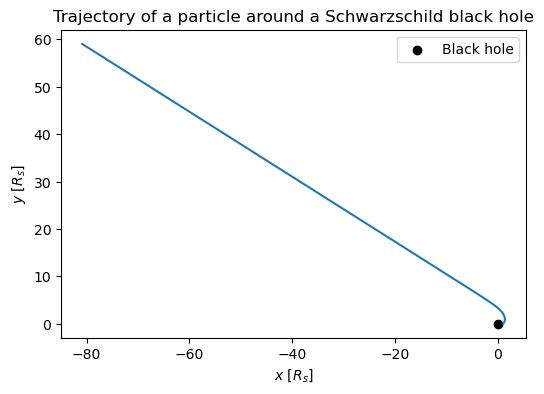

In [26]:
# Solving the EOM using solve_ivp

# Initial conditions
t0 = 0
r0 = 0.5*rs
phi0 = 0
y0 = [t0, r0, phi0]

# Integration parameters
tau_span = [0, 100]
tau_eval = np.linspace(0, 100, 1000)

# Solve the EOM
sol = solve_ivp(EOM, tau_span, y0, args=(params,), t_eval=tau_eval)

# results
t = sol.y[0]
r = sol.y[1]
phi = sol.y[2]

x = r * np.cos(phi)
y = r * np.sin(phi)

# Plot the trajectory
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.scatter([0], [0], color='black', label='Black hole')
plt.xlabel(r'$x$ [$R_s$]')
plt.ylabel(r'$y$ [$R_s$]')
plt.title('Trajectory of a particle around a Schwarzschild black hole')
plt.legend()
plt.show()

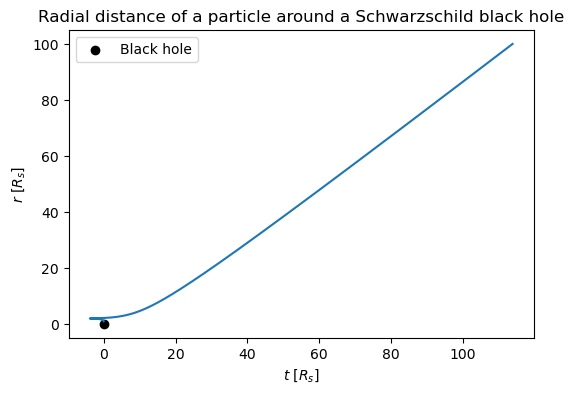

In [27]:
# Plot r and t
plt.figure(figsize=(6, 4))
plt.plot(t, r)
plt.scatter([0], [0], color='black', label='Black hole')
plt.xlabel(r'$t$ [$R_s$]')
plt.ylabel(r'$r$ [$R_s$]')
plt.title('Radial distance of a particle around a Schwarzschild black hole')
plt.legend()
plt.show()

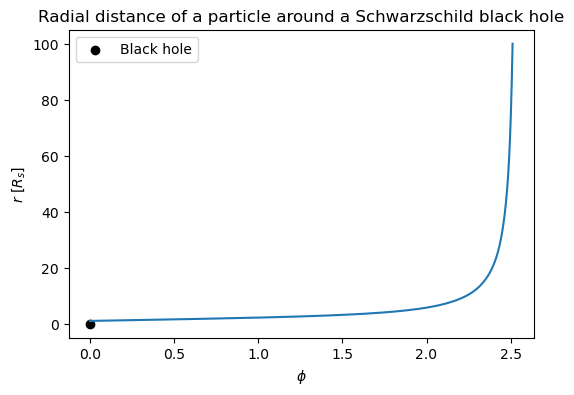

In [28]:
# plot r and phi
plt.figure(figsize=(6, 4))
plt.plot(phi, r)
plt.scatter([0], [0], color='black', label='Black hole')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$r$ [$R_s$]')
plt.title('Radial distance of a particle around a Schwarzschild black hole')
plt.legend()
plt.show()

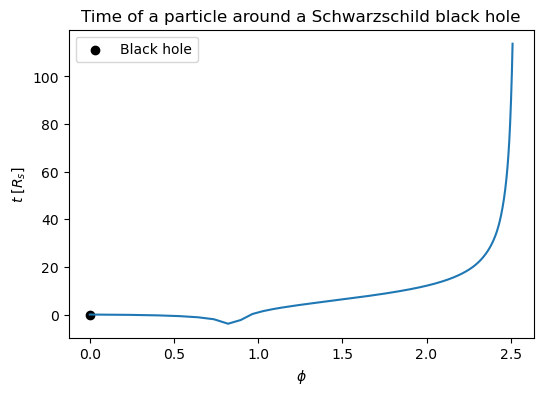

In [29]:
# plot t and phi
plt.figure(figsize=(6, 4))
plt.plot(phi, t)
plt.scatter([0], [0], color='black', label='Black hole')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$t$ [$R_s$]')
plt.title('Time of a particle around a Schwarzschild black hole')
plt.legend()
plt.show()

## Perihelion shift

In [47]:
def perihelion(phi, r, params):
    E, L, M = params
    prefactor = h(r) / L
    root_term = np.sqrt((f(r,M)**(-1)*g(r,M)**(-1)) * (E**2 + V_eff(r, L)))

    drdphi = prefactor * root_term
    return drdphi

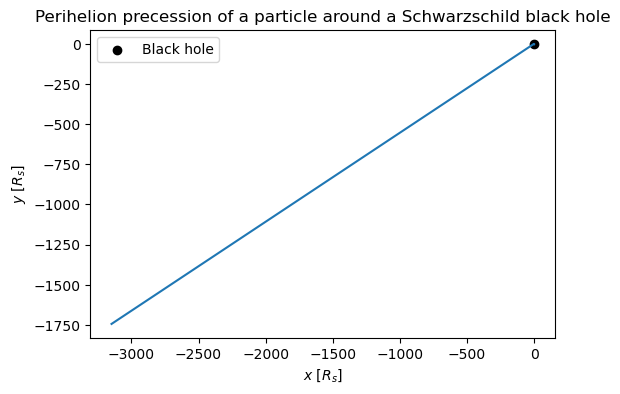

In [51]:
r0 = 0.1
phi0_span = (0, 2*np.pi)

params = [E, L, M]

phi_eval = np.linspace(phi0, 2*np.pi, 1000)

solution = solve_ivp(perihelion, phi0_span, [r0], args=(params,), t_eval=phi_eval)

r_vals = solution.y[0] 
phi_vals = solution.t

x_vals = r_vals * np.cos(phi_vals)
y_vals = r_vals * np.sin(phi_vals)

# Plot the perihelion precession
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals)
plt.scatter([0], [0], color='black', label='Black hole')
plt.xlabel(r'$x$ [$R_s$]')
plt.ylabel(r'$y$ [$R_s$]')
plt.title('Perihelion precession of a particle around a Schwarzschild black hole')
plt.legend()
plt.show()